In [13]:
library(fpp2)
library(gridExtra)

In [3]:
# 2. [20 점]. R 의 arima.sim 함수는 ARIMA(p, d, q) × (P,D,Q)s와 같은 계절형 ARIMA 모형에 대한 모의자료를 생성하지 못한다.
# 대신 R 을 이용하여 다음과 같이 200 개의 시계열자료를 문제 1 의 모형 (1)로부터 생성하고자 한다.
# 편의상 초기값을 𝑍1 = 𝑍2 = ⋯ = 𝑍14 = 0으로 지정하고 이로부터 200 개의 자료를 생성하여 분석에 사용하고자 한다.
# 이에 대한 R 샘플코드는 아래와 같다. 

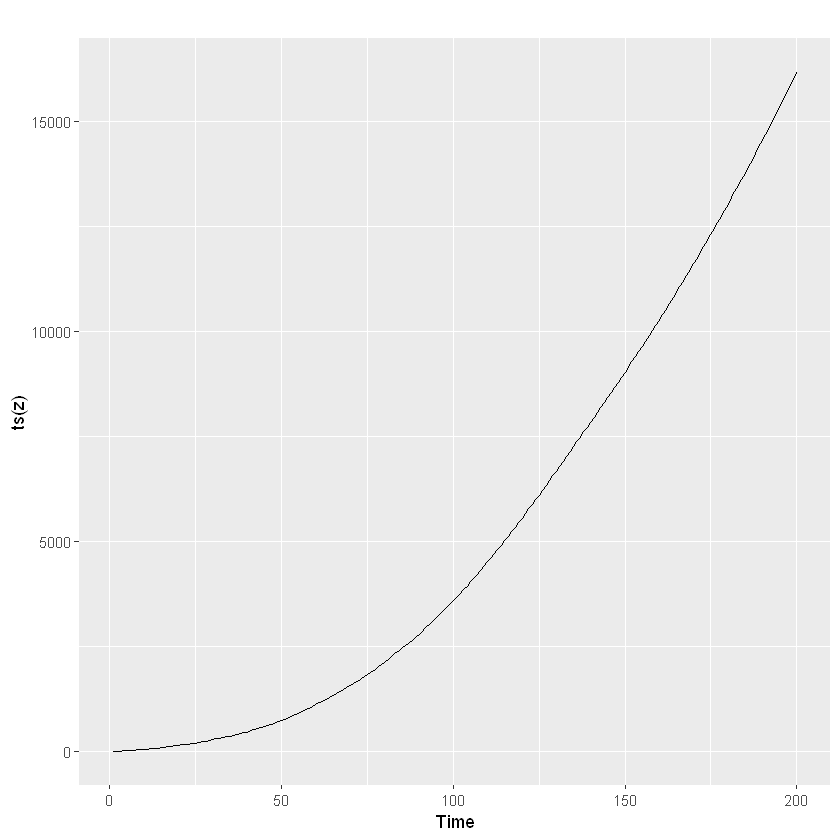

In [14]:
# (a) 문제 1(h)의 결과 (즉, 모형 (2))를 활용하여 샘플코드의 z.temp[t] = (....) 부분을 완성하라. 이를 이용하여
# 200 개의 모의실험 시계열자료 {Z_t}에 대한 시계열그림을 그려라.

set.seed(1)

n <- 200 + 14

z.temp <- rep(0,n)
e <- rnorm(n,mean=0,sd=2)

for (t in 15:n){
    z.temp[t] = 2 * z.temp[t - 1] - z.temp[t - 2] + z.temp[t - 12] -2 * z.temp[t - 13] + z.temp[t - 14] + e[t] -0.5 * e[t-1] ## fill out
}

z <- z.temp[15:n] ## simulated dataset
autoplot(ts(z))

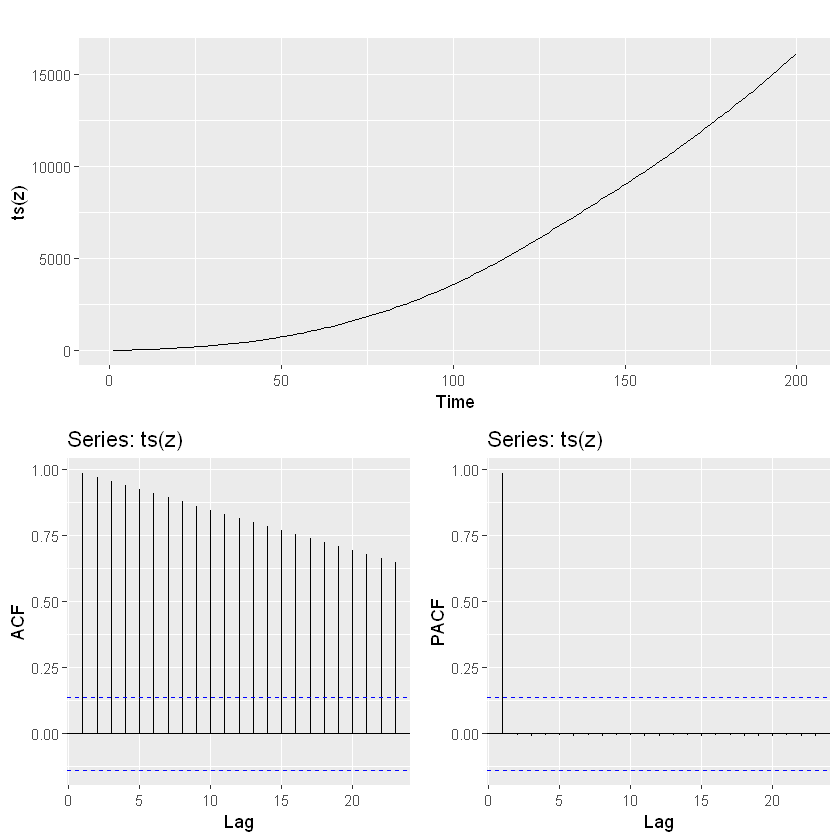

In [31]:
# (b) 모의실험 시계열자료 {Z_t} 에 대한 ACF 및 PACF 를 그리고 관측내용을 기술하라.

p0 <- autoplot(ts(z))
p1 <- ggAcf(ts(z))
p2 <- ggPacf(ts(z))

grid.arrange(p0, p1, p2,
    layout_matrix = rbind(
        c(1),
        c(2, 3)))

In [32]:
# (c) 모의실험 자료별 적절한 변화 및 차분 시도한 후 ARIMA 모형을 적합하고 잔차에 대한 ACF 및 PACF 를 그리고 결과를 논하라.

fit_auto.arima <- auto.arima(ts(z))
fit_auto.arima

Series: ts(z) 
ARIMA(1,2,2) 

Coefficients:
         ar1      ma1     ma2
      0.9847  -1.9090  0.9459
s.e.  0.0125   0.0324  0.0328

sigma^2 estimated as 23.63:  log likelihood=-594.87
AIC=1197.75   AICc=1197.96   BIC=1210.9

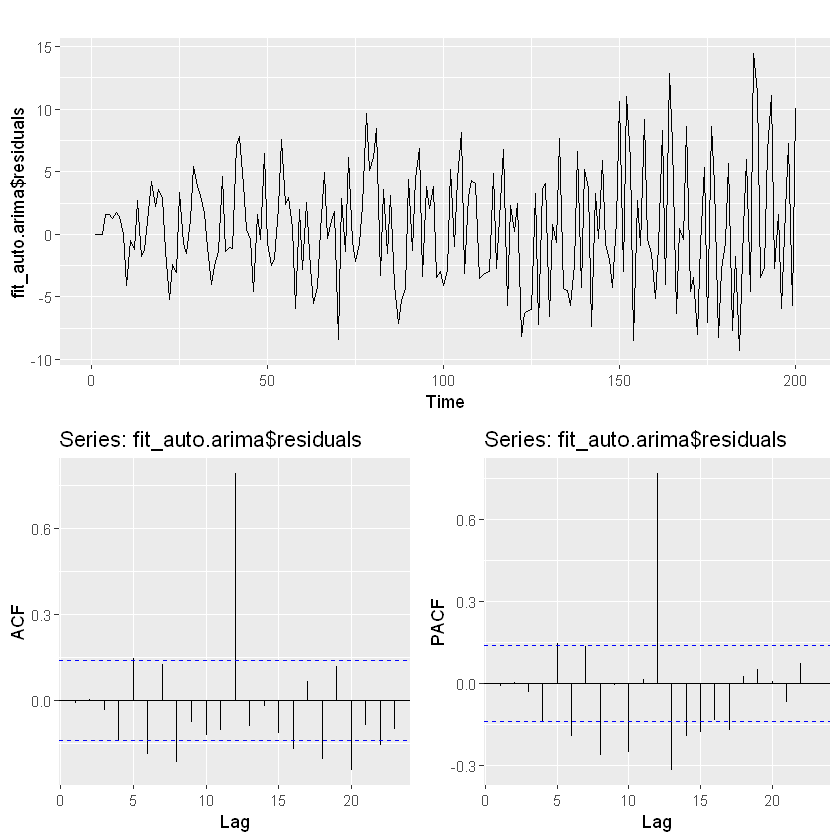

In [33]:
p0 <- autoplot(fit_auto.arima$residuals)
p1 <- ggAcf(fit_auto.arima$residuals)
p2 <- ggPacf(fit_auto.arima$residuals)

grid.arrange(p0, p1, p2,
    layout_matrix = rbind(
        c(1),
        c(2, 3)))

In [34]:
fit_auto.arima <- auto.arima(diff(ts(z), lag = 12))
fit_auto.arima

Series: diff(ts(z), lag = 12) 
ARIMA(0,2,1) 

Coefficients:
          ma1
      -0.5106
s.e.   0.0606

sigma^2 estimated as 3.641:  log likelihood=-383.74
AIC=771.48   AICc=771.55   BIC=777.93

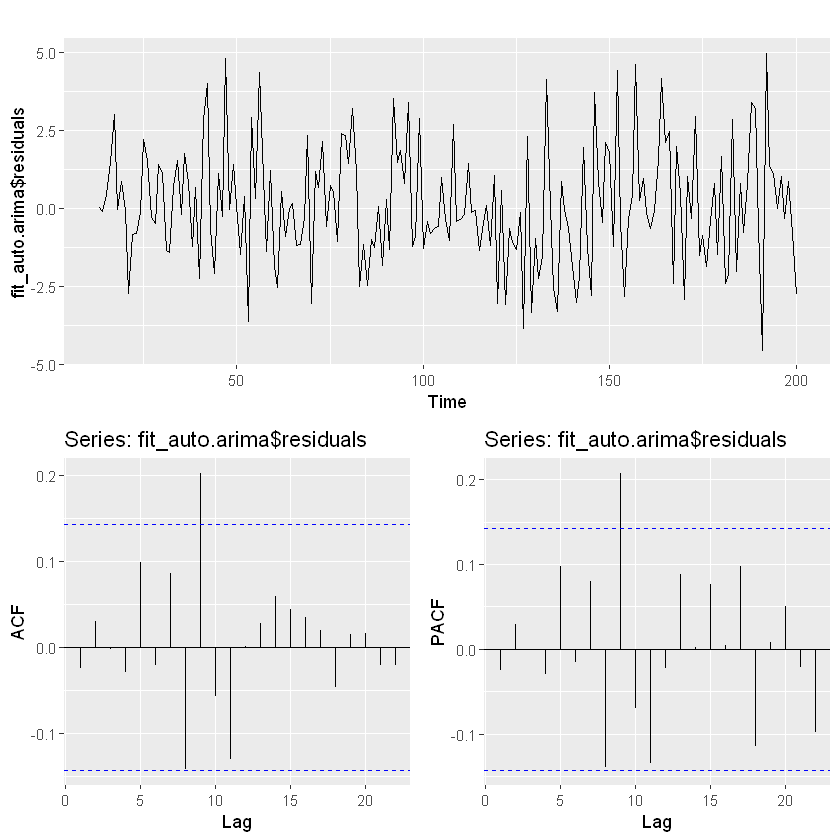

In [35]:
p0 <- autoplot(fit_auto.arima$residuals)
p1 <- ggAcf(fit_auto.arima$residuals)
p2 <- ggPacf(fit_auto.arima$residuals)

grid.arrange(p0, p1, p2,
    layout_matrix = rbind(
        c(1),
        c(2, 3)))

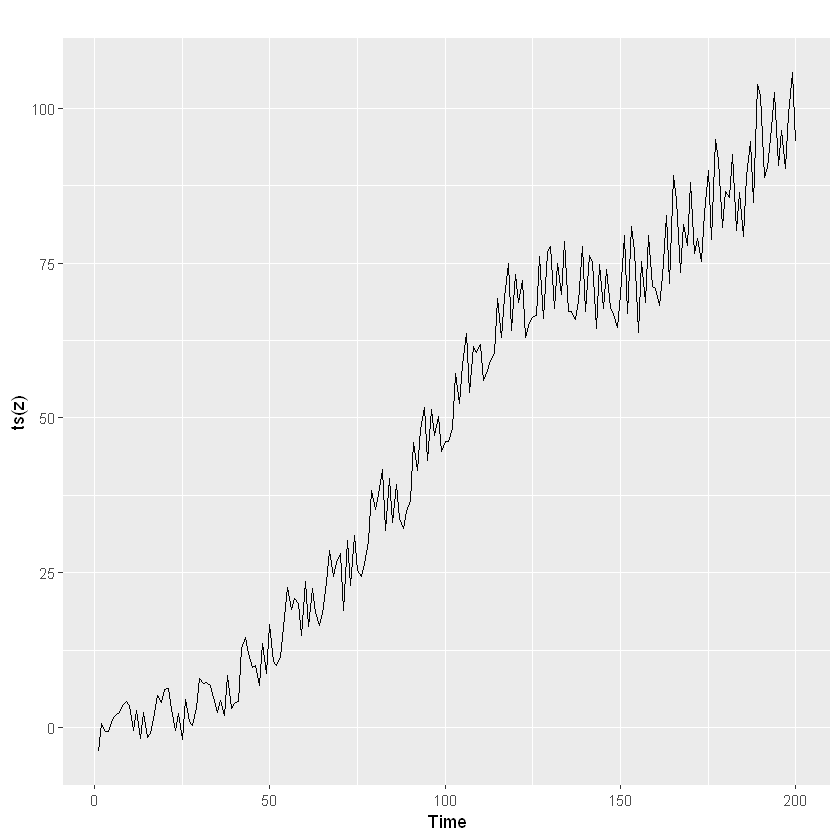

In [38]:
# (d) 다음의 시계열자료 {Zt}에 대하여 위의 문제 (a) - (c)를 반복하라

set.seed(1)

n <- 200 + 13

z.temp <- rep(0,n)
e <- rnorm(n,mean=0,sd=2)

for (t in 14:n){
    z.temp[t] = z.temp[t - 1] + z.temp[t - 12] - z.temp[t - 13] + e[t] -0.5 * e[t-1] ## fill out
}

z <- z.temp[14:n] ## simulated dataset
autoplot(ts(z))

In [39]:
fit_auto.arima <- auto.arima(ts(z))
fit_auto.arima

Series: ts(z) 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1   drift
      -0.7758  0.5037
s.e.   0.0417  0.0818

sigma^2 estimated as 25.85:  log likelihood=-605.43
AIC=1216.86   AICc=1216.98   BIC=1226.74

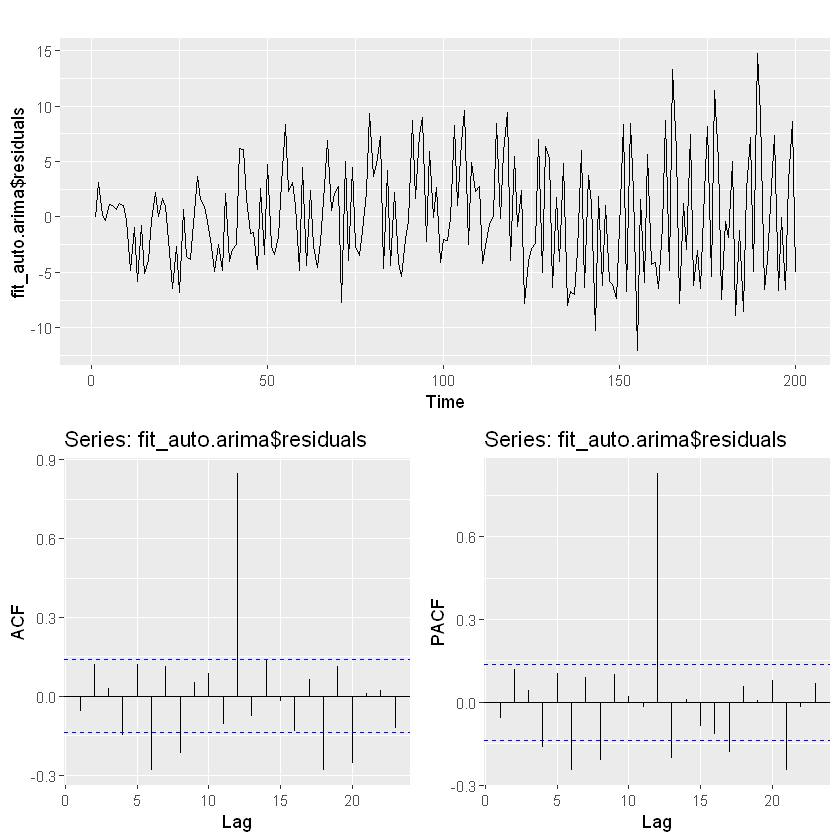

In [40]:
p0 <- autoplot(fit_auto.arima$residuals)
p1 <- ggAcf(fit_auto.arima$residuals)
p2 <- ggPacf(fit_auto.arima$residuals)

grid.arrange(p0, p1, p2,
    layout_matrix = rbind(
        c(1),
        c(2, 3)))

In [41]:
fit_auto.arima <- auto.arima(diff(ts(z), lag = 12))
fit_auto.arima

Series: diff(ts(z), lag = 12) 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.5159
s.e.   0.0594

sigma^2 estimated as 3.61:  log likelihood=-385.02
AIC=774.04   AICc=774.1   BIC=780.5

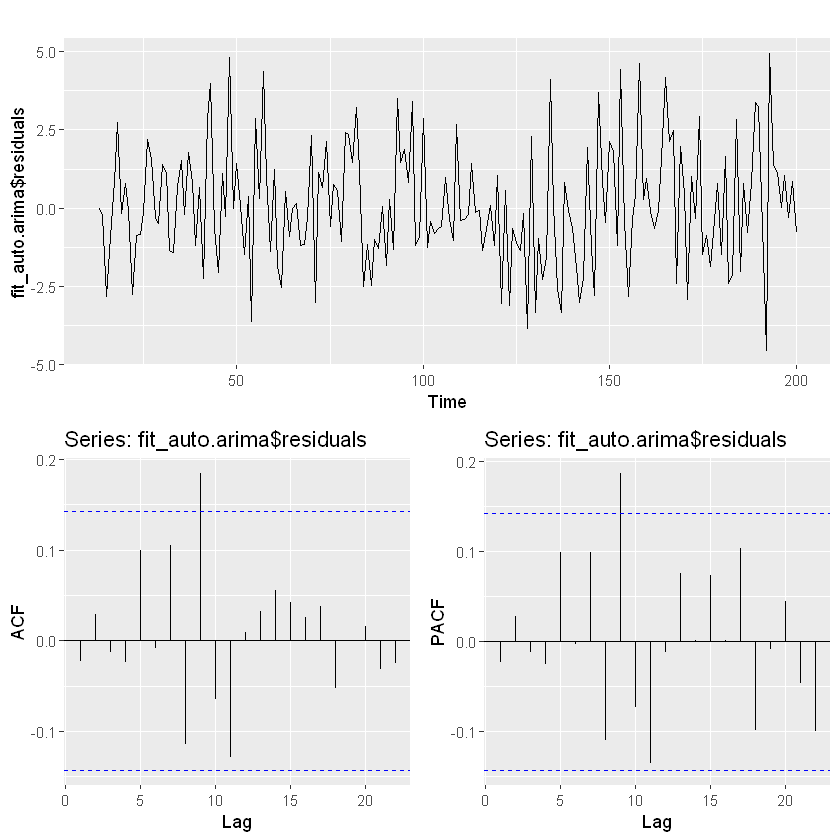

In [42]:
p0 <- autoplot(fit_auto.arima$residuals)
p1 <- ggAcf(fit_auto.arima$residuals)
p2 <- ggPacf(fit_auto.arima$residuals)

grid.arrange(p0, p1, p2,
    layout_matrix = rbind(
        c(1),
        c(2, 3)))